In [53]:
import numpy as np
import pandas as pd
import pycaret
from sklearn import preprocessing

In [63]:
df= pd.read_csv(r"C:\Users\bdr22\Downloads\masterDailyRecapAll.csv")

In [64]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Bet State Chosen,Kelly Criterion Suggestion,Payouts (per Dollar),League,Date,Success,Allocation Dollars,Allocation Percentage
0,65,0.0,Aston Villa,0.08,4.90,EPL,2021-01-01,0.0,0.284478,0.001855
1,66,0.0,Pistons,0.08,4.00,NBA,2021-01-01,1.0,0.284478,0.001855
2,67,1.0,Hornets,0.26,1.96,NBA,2021-01-01,0.0,3.004796,0.019594
3,68,2.0,Mavericks,0.49,1.57,NBA,2021-01-01,1.0,10.672359,0.069594
4,69,3.0,Hawks,0.15,3.00,NBA,2021-01-01,1.0,1.000117,0.006522


In [58]:
"""
le = preprocessing.LabelEncoder()
df['League'] = le.fit_transform(df['League'])
df

dummies = pd.get_dummies(df.League)
dummies
df_league = pd.concat([df, dummies], axis=1)
df_league
df_league.columns
"""

"\nle = preprocessing.LabelEncoder()\ndf['League'] = le.fit_transform(df['League'])\ndf\n\ndummies = pd.get_dummies(df.League)\ndummies\ndf_league = pd.concat([df, dummies], axis=1)\ndf_league\ndf_league.columns\n"

In [65]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1', 'Date'],inplace = True)
df

,Bet State Chosen,Kelly Criterion Suggestion,Payouts (per Dollar),League,Success,Allocation Dollars,Allocation Percentage
0,Aston Villa,0.08,4.90,EPL,0.0,0.284478,0.001855
1,Pistons,0.08,4.00,NBA,1.0,0.284478,0.001855
2,Hornets,0.26,1.96,NBA,0.0,3.004796,0.019594
3,Mavericks,0.49,1.57,NBA,1.0,10.672359,0.069594
4,Hawks,0.15,3.00,NBA,1.0,1.000117,0.006522
...,...,...,...,...,...,...,...
412,Timberwolves,0.18,2.46,NBA,0.0,2.079000,0.006000
413,Rockets,0.24,2.98,NBA,0.0,3.696000,0.010000
414,Clippers,0.72,1.18,NBA,1.0,33.265000,0.094000
415,GFK,0.26,2.35,TSL,0.0,4.338000,0.012000


In [49]:
#df['League'].value_counts()

In [67]:
from pycaret.classification import *
"""
classification_setup = setup(data= df_league, target='Success',remove_outliers=True,normalize=True, remove_multicollinearity=True ,normalize_method='robust',
                            feature_selection=True ,silent = True,session_id = 6969)
"""

classification_setup = setup(data=df,target='Success',categorical_features = ['League','Bet State Chosen'])

,Description,Value
0,session_id,6536
1,Target,Success
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(417, 7)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [68]:
compare_models(sort = 'AUC')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6767,0.6965,0.5000,0.6327,0.5483,0.3081,0.3158,1.6220
gbc,Gradient Boosting Classifier,0.6560,0.6829,0.4667,0.6152,0.5243,0.2647,0.2738,0.0250
lightgbm,Light Gradient Boosting Machine,0.6323,0.6712,0.4833,0.5757,0.5210,0.2262,0.2316,0.0320
rf,Random Forest Classifier,0.6115,0.6595,0.4250,0.5337,0.4658,0.1715,0.1751,0.1030
ada,Ada Boost Classifier,0.6422,0.6593,0.4833,0.5644,0.5139,0.2409,0.2408,0.0210
xgboost,Extreme Gradient Boosting,0.6015,0.6474,0.4750,0.5209,0.4898,0.1660,0.1701,0.1840
lr,Logistic Regression,0.5943,0.6315,0.3833,0.5075,0.4310,0.1298,0.1324,0.3720
knn,K Neighbors Classifier,0.6014,0.6092,0.4750,0.5152,0.4886,0.1652,0.1675,0.1930
et,Extra Trees Classifier,0.5774,0.6051,0.3833,0.4853,0.4251,0.0999,0.1016,0.1020
lda,Linear Discriminant Analysis,0.5806,0.5598,0.4000,0.5019,0.4377,0.1112,0.1164,0.0080


In [69]:
cb_model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7667,0.7685,0.5833,0.7778,0.6667,0.4928,0.5048
1,0.6897,0.6275,0.6667,0.6154,0.6400,0.3680,0.3689
2,0.7241,0.8333,0.5833,0.7000,0.6364,0.4171,0.4216
3,0.6207,0.6471,0.3333,0.5714,0.4211,0.1671,0.1805
4,0.8276,0.8039,0.7500,0.8182,0.7826,0.6402,0.6419
5,0.7241,0.7255,0.6667,0.6667,0.6667,0.4314,0.4314
6,0.6897,0.7206,0.4167,0.7143,0.5263,0.3185,0.3442
7,0.5862,0.7402,0.1667,0.5000,0.2500,0.0543,0.0700
8,0.6552,0.7304,0.5000,0.6000,0.5455,0.2714,0.2743
9,0.4828,0.3676,0.3333,0.3636,0.3478,-0.0794,-0.0796


In [ ]:
tuned_cb = tune_model(cb_model,optimize = 'AUC',n_iter = 150)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:50:31
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 12.7min


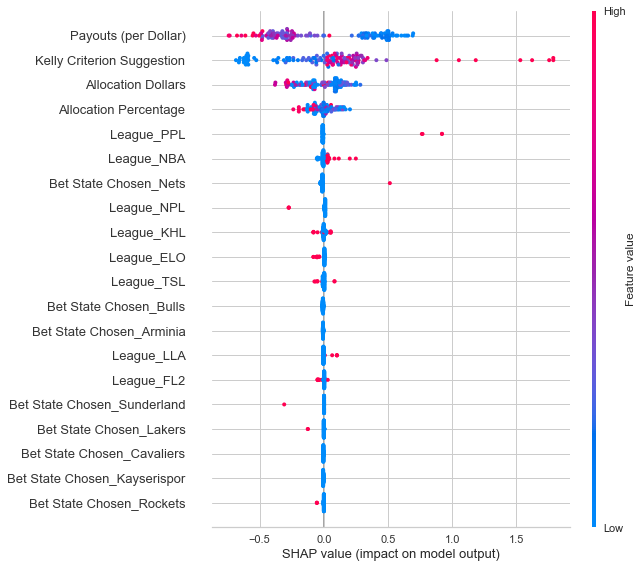

In [76]:
interpret_model(tuned_cb)

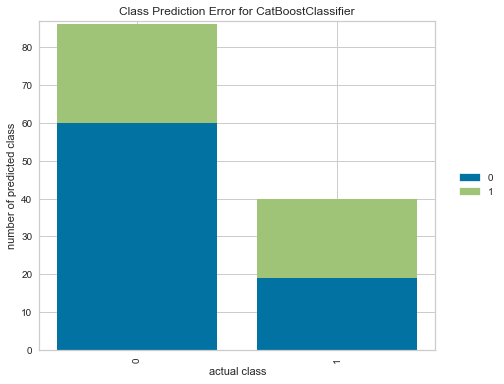

In [77]:
plot_model(tuned_cb,'error')

In [78]:
interpret_model(tuned_cb, plot = 'reason', observation = 10)

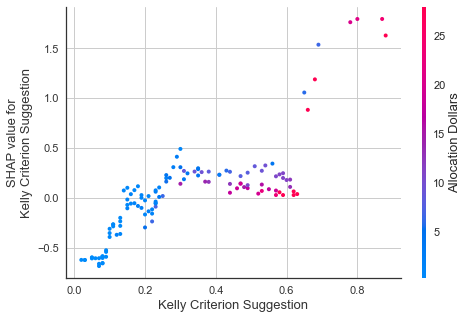

In [79]:
interpret_model(tuned_cb, plot = 'correlation')

In [80]:
predictions = predict_model(tuned_cb, data = df)

In [82]:
predictions

,Bet State Chosen,Kelly Criterion Suggestion,Payouts (per Dollar),League,Success,Allocation Dollars,Allocation Percentage,Label,Score
0,Aston Villa,0.08,4.90,EPL,0.0,0.284478,0.001855,0.0,0.8699
1,Pistons,0.08,4.00,NBA,1.0,0.284478,0.001855,0.0,0.8055
2,Hornets,0.26,1.96,NBA,0.0,3.004796,0.019594,1.0,0.5598
3,Mavericks,0.49,1.57,NBA,1.0,10.672359,0.069594,0.0,0.5351
4,Hawks,0.15,3.00,NBA,1.0,1.000117,0.006522,1.0,0.5215
...,...,...,...,...,...,...,...,...,...
412,Timberwolves,0.18,2.46,NBA,0.0,2.079000,0.006000,0.0,0.5997
413,Rockets,0.24,2.98,NBA,0.0,3.696000,0.010000,0.0,0.6678
414,Clippers,0.72,1.18,NBA,1.0,33.265000,0.094000,1.0,0.7140
415,GFK,0.26,2.35,TSL,0.0,4.338000,0.012000,1.0,0.5177


<AxesSubplot:ylabel='Density'>

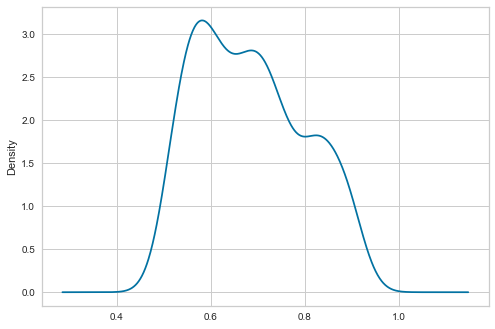

In [85]:
predictions['Score'].plot.kde()